In [2]:
# For data processing
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# For model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # For ensemble learning
from sklearn.model_selection import GridSearchCV  # For ensemble learning

# For evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix

# For data preparation for ML models
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [15]:
#Dataset
df = pd.read_csv("TelcoCustomerChurn.csv")
df.shape
(7043, 21)

(7043, 21)

In [172]:
mapp =df.copy()
mapp.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [4]:
#no null values found
df.isna().sum().sum()

0

In [5]:
#Target variable balance checck 
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

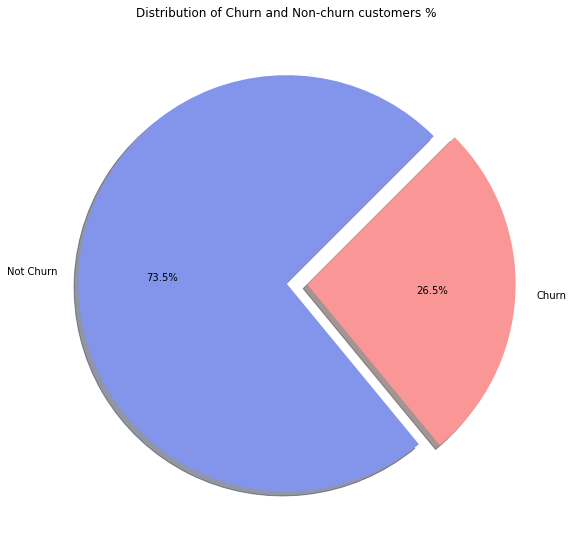

In [11]:
#Target value percentage
plt.figure(figsize=(8, 8))
labels=["Not Churn", "Churn"]
colors = ["#8395eb", "#fa9696"]
df["Churn"].value_counts().plot(kind = "pie", explode=[0, 0.10], 
                                  startangle = 45, shadow=True, labels=labels, colors=colors,
                                  autopct='%1.1f%%')

plt.title("Distribution of Churn and Non-churn customers %")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Check data types 
columns = df.columns
objects_cols = []
for col in columns:
    if df[col].value_counts().shape[0] != 2:
        objects_cols.append(col)

In [7]:
objects_cols

['customerID',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [8]:
#Check data types 
columns = df.columns
binaryclasify_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binaryclasify_cols.append(col)
binaryclasify_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [9]:
#taking variables uniquesness
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

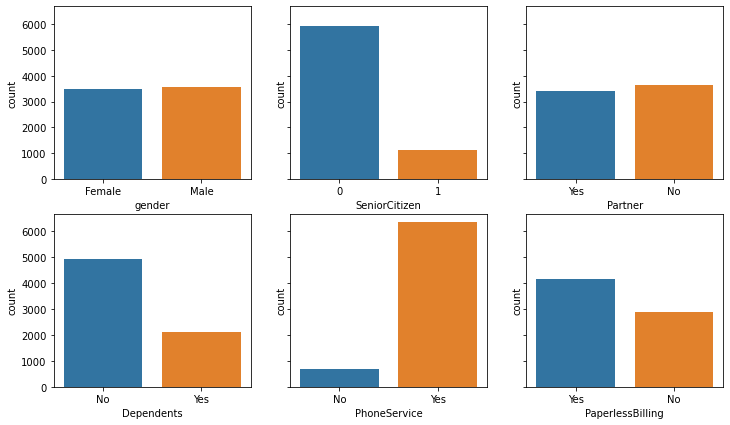

In [12]:
#binary variable count against target variable
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

In [25]:
#Converiosn to numerical 
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [26]:
#Binary variable Percentage against target variable
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [ ]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

In [ ]:
df[['Partner','Churn']].groupby(['Partner']).mean()

In [ ]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

In [12]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [30]:
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['Dependents'], aggfunc=np.mean)
table

Dependents,No,Yes
gender,,
Female,0.314634,0.160506
Male,0.310958,0.148799


In [31]:
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['Partner'], aggfunc=np.mean)
table

Partner,No,Yes
gender,,
Female,0.344444,0.188981
Male,0.315046,0.204201


In [32]:
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


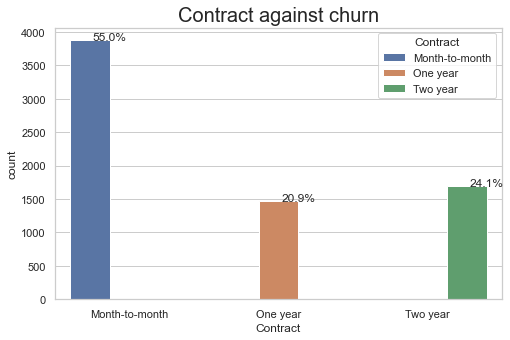

In [36]:
#Other variable Percentage 
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="Contract", hue="Contract", data=df)
plt.title('Contract against churn', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

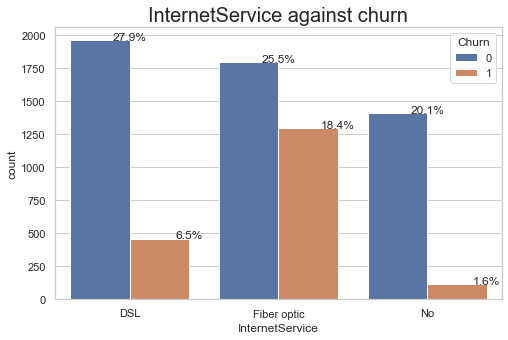

In [38]:
#other variable percentages against target variable
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title('InternetService against churn', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [21]:
df[['InternetService','MonthlyCharges']].groupby(['InternetService']).mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


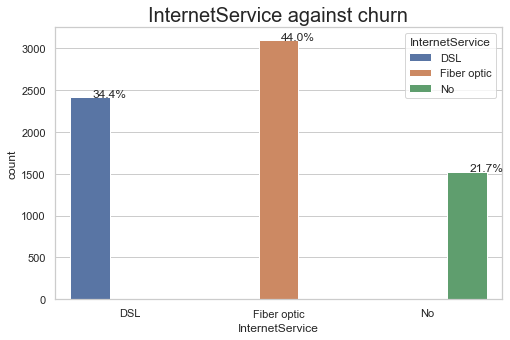

In [44]:

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="InternetService", hue="InternetService", data=df)
plt.title('InternetService against churn', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

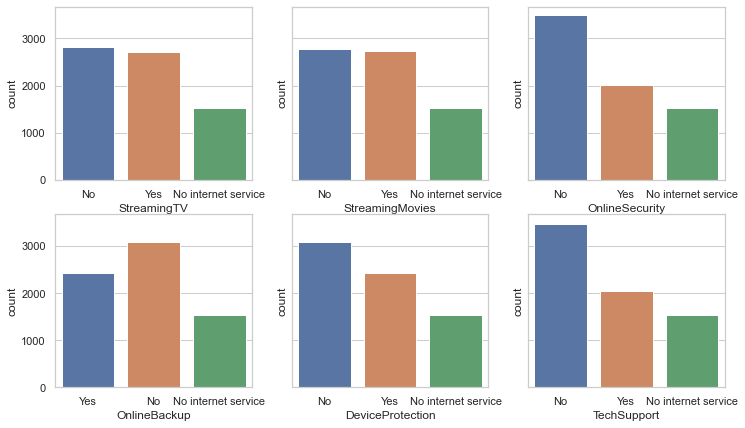

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

plt.show()

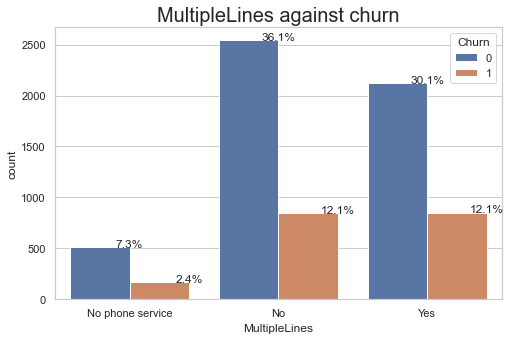

In [53]:


sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="MultipleLines", hue="Churn", data=df)
plt.title('MultipleLines against churn', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()



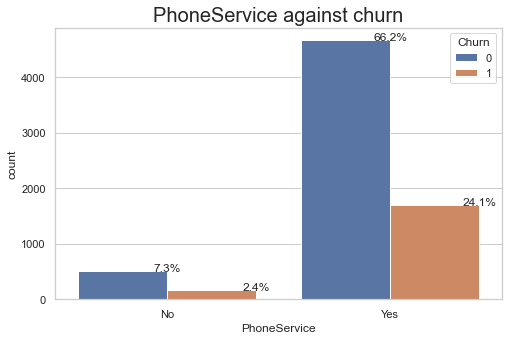

In [54]:

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="PhoneService", hue="Churn", data=df)
plt.title('PhoneService against churn', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

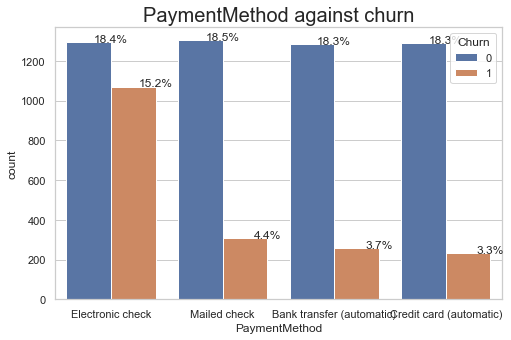

In [55]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title('PaymentMethod against churn', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

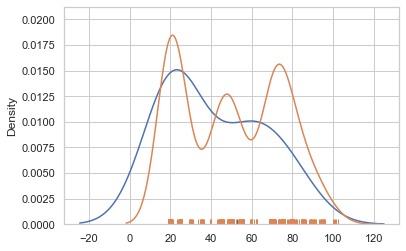

In [70]:
# deviation point of tenure and monthly chargers 
target_0 = df.loc[df['tenure'] == 0]
target_1 = df.loc[df['tenure'] == 1]


sns.distplot(target_0[['MonthlyCharges']], hist=False, rug=True)
sns.distplot(target_1[['MonthlyCharges']], hist=False, rug=True)


plt.show()

In [74]:
# check which contrct type long lasting

df[['Contract','tenure']].groupby(['Contract']).mean()


,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


## ------------Feature Engineering------------------

In [75]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [76]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [77]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Encoding categorical variables:

In [78]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [79]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [80]:
#scaled down numerical and continous variables 
match = MinMaxScaler()
a = match.fit_transform(df[['tenure']])
b = match.fit_transform(df[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [82]:
X.head(2)

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
X.shape


(7043, 26)

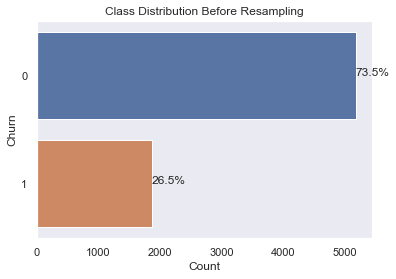

In [84]:
#balance/imbalance checking 
ax = sns.countplot(y="Churn", data=df)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Count')

total = len(df['Churn'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [85]:
#Assign feature_ counts
Cno = X[X.Churn == 0]
Cyes = X[X.Churn == 1]

In [87]:
#Balancing the imbalance data
from sklearn.utils import resample
upsample = resample(Cyes,
             replace=True,
             n_samples=len(Cno),
             random_state=42)

print(upsample.shape)

(5174, 26)


0    5174
1    5174
Name: Churn, dtype: int64


<AxesSubplot:ylabel='Type'>

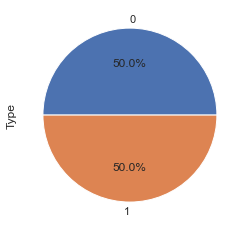

In [93]:
#check new balance / imbalance
downsampled = pd.concat([upsample, Cno])
print(downsampled["Churn"].value_counts())

downsampled.groupby('Churn').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [94]:
upsampled['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Indepentend and target variable seperation

In [95]:
from sklearn.model_selection import train_test_split
X = upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = upsampled['Churn'] #target (dependent variable)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### ----------Model building------------

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=5, solver='sag',max_iter=10000).fit(X_train,y_train)

In [98]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[791 235]
 [261 783]]


In [100]:
# For model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # For ensemble learning
from sklearn.model_selection import GridSearchCV  # For ensemble learning

# For evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix

In [103]:
def model_performance(model, testing_set):
    """
    This function takes in a class of a model, then builds a model 
    on the existing training set and tests upon the given testing sets.
    Also can get the visualization of confusion matrices.
    
    """
    mod_ = model()
    mod_.fit(X_train, y_train)
    y_preds = mod_.predict(X_test)
    acc_score = np.round(accuracy_score(testing_set, y_preds)*100, 3)
    print(f"{type(mod_).__name__} model has an accuracy of {acc_score}%")
    
    confusion_mat = confusion_matrix(y_test, y_preds)
    plt.figure(figsize=(4, 4))
    plt.title(f"Confusion Matrix for {type(mod_).__name__} model".center(60, " "), size=12)
    g = sns.heatmap(confusion_mat, linewidth=0.5, cbar=False, annot=True, cmap=cmap, fmt='g')
    g.set_yticklabels(['Did not\nChurn', 'Churn'], size=8)
    g.set_xticklabels(['Did not\nChurn', 'Churn'], size=8)
    g.set_ylabel("True Label", size=12)
    g.set_xlabel("Predicted Label", size=12)
    return plt.show()

LogisticRegression model has an accuracy of 76.039%


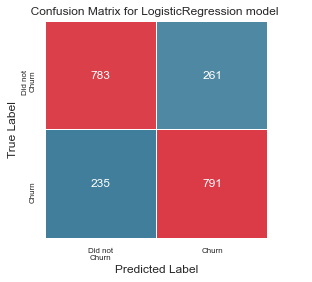

KNeighborsClassifier model has an accuracy of 77.44%


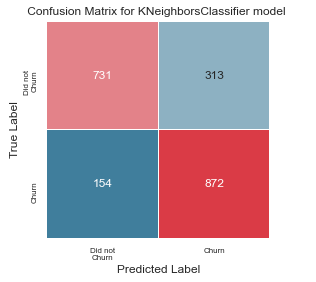

SVC model has an accuracy of 77.198%


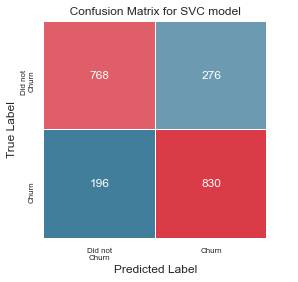

DecisionTreeClassifier model has an accuracy of 88.889%


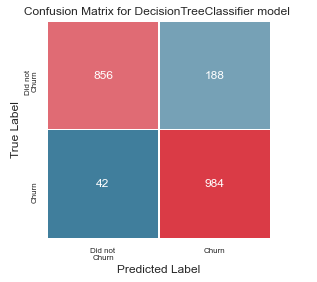

In [104]:
model_performance(LogisticRegression, y_test.values.reshape(-1,1))
model_performance(KNeighborsClassifier, y_test.values.reshape(-1,1))
model_performance(SVC, y_test.values.reshape(-1,1))
model_performance(DecisionTreeClassifier, y_test.values.reshape(-1,1))

In [105]:
import statsmodels.api as sm

In [106]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     222.4
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        07:10:12   Log-Likelihood:                -4298.0
No. Observations:                8278   AIC:                             8636.
Df Residuals:                    8258   BIC:                             8776.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.9206      0.120      7.680      0.000       0.686       1.156
tenure                                   -0.5072      0.019    -26.624      0.000      -0.545      -0.470
MonthlyCharges                           -1.2996      0.446     -2.916      0.004      -2.173      -0.426
SeniorCitizen_1                           0.0503      0.012      4.127      0.000       0.026       0.074
Partner_Yes                               0.0037      0.011      0.344      0.731      -0.017       0.025
Dependents_Yes                           -0.0472      0.012     -3.947      0.000      -0.071      -0.024
MultipleLines_No phone service           -0.1791      0.091     -1.979      0.048      -0.357      -0.002
MultipleLines_Yes                         0.1179      0.025      4.747      0.000       0.069       0.167
InternetService_Fiber optic               0.4942      0.111      4.434      0.000       0.276       0.713
InternetService_No                       -0.0773      0.016     -4.808      0.000      -0.109      -0.046
OnlineSecurity_No internet service       -0.0773      0.016     -4.808      0.000      -0.109      -0.046
OnlineSecurity_Yes                       -0.0207      0.025     -0.820      0.412      -0.070       0.029
OnlineBackup_No internet service         -0.0773      0.016     -4.808      0.000      -0.109      -0.046
OnlineBackup_Yes                          0.0509      0.025      2.059      0.039       0.002       0.099
DeviceProtection_No internet service     -0.0773      0.016     -4.808      0.000      -0.109      -0.046
DeviceProtection_Yes                      0.0420      0.025      1.693      0.091      -0.007       0.091
TechSupport_No internet service          -0.0773      0.016     -4.808      0.000      -0.109      -0.046
TechSupport_Yes                          -0.0283      0.025     -1.116      0.264      -0.078       0.021
StreamingTV_No internet service          -0.0773      0.016     -4.808      0.000      -0.109      -0.046
StreamingTV_Yes                           0.1568      0.046      3.430      0.001       0.067       0.246
StreamingMovies_No internet service      -0.0773      0.016     -4.808      0.000      -0.109      -0.046
StreamingMovies_Yes                       0.1621      0.046      3.551      0.000       0.073       0.252
PaperlessBilling_Yes                      0.0615      0.010      6.005      0.000       0.041       0.082
PaymentMethod_Credit card (automatic)    -0.0217      0.015     -1.486      0.137      -0.050       0.007
PaymentMethod_Electronic check            0.0832      0.013      6.264      0.000       0.057       0.109
PaymentMethod_Mailed check               -0.0009      0.015     -0.056      0.955      -0.031       0.029
=========

In [149]:
from sklearn import metrics
print('Mean Absolute Error: ' + str(round(metrics.mean_absolute_error(y_test, y_pred),2)))
print('Mean Squared Error: ' + str(round(metrics.mean_squared_error(y_test, y_pred),2))) 
print('Root Mean Squared Error: ' + str(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))) 

Mean Absolute Error: 0.33
Mean Squared Error: 0.16
Root Mean Squared Error: 0.4


----use ridge classifier as a base model

In [109]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [110]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

Making predictions on training set and evaluating:

In [166]:
pred = clf_ridge.predict(X_train)

print('Accuracy_score for training set: ' + str(round(accuracy_score(y_train, pred),3)))

Accuracy_score for training set: 0.757


Making predictions on Testing set and evaluating:

In [162]:
pred_test = clf_ridge.predict(X_test)
print('Accuracy_score for testing set: ' + str(round(accuracy_score(y_test, pred_test),3))) 

Accuracy_score for testing set: 0.761


Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=8)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

Making predictions on training set and evaluating:

In [167]:
pred = clf_forest.predict(X_train)

print('Accuracy_score using RF for training set: ' + str(round(accuracy_score(y_train, pred),3))) 

Accuracy_score using RF for training set: 0.822


Making predictions on test set and evaluating:

In [168]:
pred_test = clf_forest.predict(X_test)
print('Accuracy_score using RF for testing set: ' + str(round(accuracy_score(y_test, pred_test),3))) 

Accuracy_score using RF for testing set: 0.804


### ----- Parameter tuning-----

In [118]:
from sklearn.model_selection import GridSearchCV

Creating a GridSearchCV object:

In [121]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [122]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [123]:
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}

{'max_depth': 20, 'n_estimators': 150}

In [124]:
clf.best_score_

0.9006581162455666

In [125]:
#importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [126]:
y_pred = rfc.predict(X_test)
print("Classification report _\n", classification_report(y_test,y_pred))

Classification report _
               precision    recall  f1-score   support

           0       0.97      0.85      0.90      1044
           1       0.86      0.97      0.91      1026

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070



Text(0.5, 1.0, 'Accuracy Score: 0.9077294685990338')

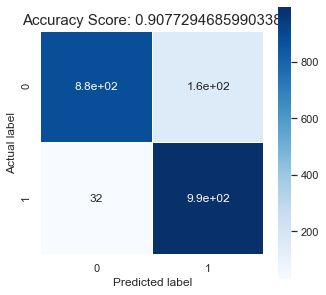

In [130]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

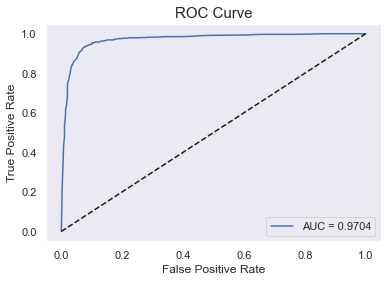

In [135]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()